In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import datasets

#import test data
path_test = "/content/drive/MyDrive/ml/test_data.csv"
test_data = pd.read_csv(path_test, header=None)
#import train data
path_train = "/content/drive/MyDrive/ml/train_data.csv"
train_data = pd.read_csv(path_train, header=None)
#import labels
path_labels = "/content/drive/MyDrive/ml/train_labels.csv"
labels = pd.read_csv(path_labels, header=None)

In [ ]:
#assign dataset to X, y
X, y = train_data, labels

In [ ]:
#check data statistics
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,6.286433,13.350650,3.531448,22.873533,10.454825,14.363025,5.721232,29.829601,27.377143,-0.818489,12.068791,17.648596,-17.159302,21.567729,19.217049,19.281303,16.567835,11.189497,10.222597,19.751802,1.885969,49.487078,14.545106,21.239023,3.899700,9.486440,18.627900,8.334335,17.229049,19.032897,...,4.747590,15.831857,6.728198,3.012890,17.141935,19.255958,24.642075,-2.983559,8.312566,29.012715,15.139306,25.456916,17.454014,14.131114,15.453388,22.955795,14.153303,10.486940,13.088111,11.506612,-0.657241,7.992304,22.543905,21.155870,19.835779,16.237855,18.327401,5.386386,19.133179,13.781744,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,689.672409,588.918009,871.447661,662.297860,906.012700,204.340810,944.888381,852.384104,348.648939,798.189068,370.767184,239.474391,795.991877,208.242102,200.908541,353.632476,183.395350,234.444130,785.898280,461.304358,728.207621,965.643295,247.419975,264.312515,479.857444,324.382415,378.912487,939.027179,373.238211,160.172849,...,591.060721,709.159411,626.296841,321.570306,349.245599,491.430754,362.060253,956.579860,290.280494,952.381479,245.084563,635.643186,470.130815,413.209265,150.786792,743.201042,196.915102,700.473269,165.828912,190.614991,743.878210,220.958021,920.353638,156.142558,304.545158,800.205404,753.801384,842.471046,638.618475,150.958797,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,-2327.191000,-2256.951000,-2805.075000,-2518.330000,-3423.081000,-671.509000,-3531.970000,-3430.948000,-1252.486000,-3035.004000,-1228.368000,-1269.200000,-2812.817000,-870.226000,-679.629000,-1250.714000,-745.634000,-957.878000,-2684.554000,-1742.139000,-2462.690000,-3404.829000,-969.309000,-1027.430000,-1803.321000,-1171.648000,-1334.274000,-3555.505000,-1519.434000,-518.194000,...,-2267.436000,-2810.345000,-2162.684000,-1021.832000,-1418.775000,-1576.764000,-1405.031000,-3314.789000,-1089.824000,-3462.219000,-886.795000,-2606.267000,-1755.988000,-1634.744000,-497.312000,-2365.494000,-642.452000,-2291.558000,-573.717000,-609.632000,-2891.345000,-738.991000,-3047.518000,-599.283000,-981.798000,-3547.046000,-2631.175000,-3056.403000,-2375.843000,-465.258000,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-256

In [ ]:
#check data variation
X.var()

0       8.189465e+04
1       4.544002e+04
2       1.906633e+09
3       3.263089e+09
4       4.814718e+08
            ...     
9995    4.298982e+05
9996    4.191501e+04
9997    6.288845e+05
9998    3.958029e+05
9999    5.904474e+05
Length: 10000, dtype: float64

In [ ]:
#check null values
X.isnull().values.any()
y.isnull().values.any()

False

([<matplotlib.axis.XTick at 0x7f2162e94890>,
 [Text(0, 0, '1'), Text(0, 0, '-1')])

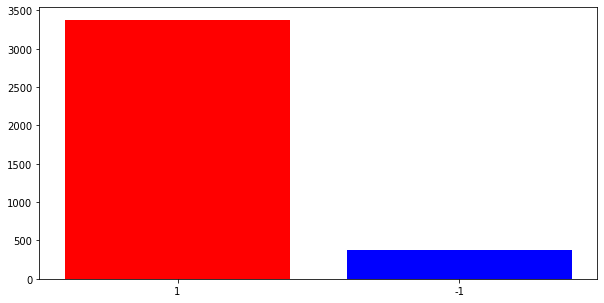

In [ ]:
#plot to see distribution of labels


height = [int(y.value_counts()[1]), int(y.value_counts()[-1])]
bars = ('1', '-1')
y_pos = np.arange(len(height))
 
#Figsize
plt.figure(figsize=(10,5))
 
# Create bars
plt.bar(y_pos, height, color = ['red', 'blue'])
  
# Create names on the x-axis
plt.xticks(y_pos, bars)

In [ ]:
#distribution of labels

y.value_counts()

 1    3375
-1     375
dtype: int64

In [ ]:
#check outliers using iqr

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
a = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))
a = a*1

#check results of iqr outliers detection
print(a.sample(10))



outliners = []
for index, row in a.iterrows():   
    mean = (row.value_counts()[1]/row.value_counts()[0])*100
    if mean > 2:
      outliners.append(index)

if(len(outliners) > 0):
  print(outliners)
else:
  print("There is not a row with over 2% of outliers")

      0     1     2     3     4     5     ...  9994  9995  9996  9997  9998  9999
165      0     0     0     0     0     0  ...     0     0     0     0     0     0
779      0     0     0     0     0     0  ...     0     0     0     0     0     0
2956     0     0     0     0     0     0  ...     0     0     0     0     0     0
874      0     0     0     0     0     0  ...     0     0     0     0     0     0
100      0     0     0     0     0     0  ...     0     0     0     0     0     0
1625     0     0     0     0     0     0  ...     0     0     0     0     0     0
1127     0     0     0     0     0     0  ...     0     0     0     0     0     0
3531     0     0     0     0     0     0  ...     0     0     0     0     0     0
1439     0     0     0     0     0     0  ...     0     0     0     0     0     0
2376     0     0     0     0     0     0  ...     0     0     0     0     0     0

[10 rows x 10000 columns]
There is not a row with over 2% of outliers


In [ ]:
#preparing data for visualization
pipe = Pipeline([('pca', PCA(n_components=0.97)), ('tsne', TSNE(n_components=2))])
X = pipe.fit_transform(X)


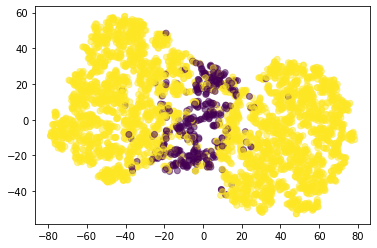

In [ ]:
#data visualization
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)

In [ ]:
#prepare data for pca
X_pca = X
#pca 0.97
pca = PCA(n_components = 0.97)
pca.fit(X_pca)
X_pca = pca.transform(X_pca)
#check shape of data after pca 0.97
X_pca.shape

(3750, 2)